<a href="https://colab.research.google.com/github/graccelinn/optimization_project1/blob/main/project_1_grace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RM294 OPTIMIZATION - PROJECT 1**

*Members: Melissa Cai Shi, Grace Lin, Abhigyan Pandya, and Franco Salinas*

In [ ]:
# Collab requires to install Gurobi everytime
# !pip install gurobipy

In [ ]:
# load need libraries
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

### **Part 1: Load and prepare data**

In [ ]:
# load 2019 and 2020 data
stocks_2019_df = pd.read_csv('stocks2019.csv', index_col=0)
stocks_2020_df = pd.read_csv('stocks2020.csv', index_col=0)

In [ ]:
# calculate returns
returns_2019 = stocks_2019_df.pct_change().dropna()
returns_2020 = stocks_2020_df.pct_change().dropna()

In [ ]:
# Remove NDX - this is the NASDAQ index, we want the individual stocks that make up the index/portfolio
returns_2019_clean = returns_2019.drop('NDX', axis=1)
returns_2020_clean = returns_2020.drop('NDX', axis=1)

In [ ]:
# Take a look at the 2019 data
returns_2019_clean.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,-0.060405,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2019-01-04,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,0.024278,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
2019-01-07,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,0.006288,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
2019-01-08,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,0.024396,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
2019-01-09,0.017210,0.011819,-0.026988,0.012430,0.038196,-0.003427,-0.001505,0.001714,-0.001196,0.025340,...,0.023745,0.018804,-0.008157,0.003781,0.023065,0.012050,-0.004612,0.044083,-0.007984,0.008972


In [ ]:
# Take a look at the 2020 data
returns_2020_clean.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1/3/20,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,-0.017604,...,-0.021369,-0.017207,0.021095,0.009728,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
1/6/20,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,-0.011749,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844
1/7/20,0.010043,-0.000959,-0.002893,0.002533,-0.009864,-0.001932,-0.000624,0.002092,-0.009405,0.022751,...,0.045951,0.008528,0.002318,0.008369,-0.001071,-0.005035,0.020414,0.067698,-0.002077,0.022830
1/8/20,-0.007623,0.013438,-0.008705,0.016191,0.010386,0.007118,0.007880,-0.007809,0.000756,0.009032,...,-0.012323,0.019400,0.004626,0.009208,0.032620,-0.058357,0.033304,0.014484,-0.000961,-0.002815
1/9/20,-0.009018,0.007636,0.023834,0.019893,0.036853,0.010498,0.011044,0.004799,0.002980,0.000000,...,0.006781,0.021318,0.023169,0.009638,-0.003592,-0.020598,0.004309,-0.000291,0.002244,0.023493


In [ ]:
# get total number of stocks
n_stocks = len(returns_2019_clean.columns)
n_stocks

100

## **Part 2: Finding portfolio that minimizes the daily average beta-CVaR using the 2019 data**

In [ ]:
# === Part 2 – β-CVaR Minimization (β=0.95, R=0.02%) ===

p19 = pd.read_csv("stocks2019.csv", index_col=0)
p20 = pd.read_csv("stocks2020.csv", index_col=0)

r19, r20 = p19.pct_change().dropna(), p20.pct_change().dropna()
INDEX, BETA, R_FLOOR = "NDX", 0.95, 0.0002

assets = [c for c in r19.columns if c != INDEX]
Y, q, n = r19[assets].to_numpy(), *r19[assets].to_numpy().shape
mu = r19[assets].mean().to_numpy()

m = gp.Model("cvar"); m.Params.OutputFlag = 0
x   = m.addVars(n, lb=0.0)                       # weights
a   = m.addVar(lb=-GRB.INFINITY)                 # alpha (VaR proxy)
u   = m.addVars(q, lb=0.0)                       # tail slacks
m.addConstr(gp.quicksum(x[j] for j in range(n)) == 1)               # budget
m.addConstr(gp.quicksum(mu[j]*x[j] for j in range(n)) >= R_FLOOR)   # mean floor
for k in range(q): m.addConstr(-gp.quicksum(Y[k,j]*x[j] for j in range(n)) - a - u[k] <= 0)
m.setObjective(a + (1/((1-BETA)*q))*gp.quicksum(u[k] for k in range(q)), GRB.MINIMIZE)
m.optimize()

w = pd.Series([x[j].X for j in range(n)], index=assets)
def var_cvar(wts, R, beta=BETA):
    pr = R[wts.index].to_numpy() @ wts.to_numpy()
    L  = -pr
    try:  v = np.quantile(L, beta, method="linear")
    except TypeError: v = np.quantile(L, beta, interpolation="linear")
    return float(v), float(L[L>=v-1e-12].mean())

v19, c19 = var_cvar(w, r19);  v20, c20 = var_cvar(w, r20)
ndx19 = var_cvar(pd.Series({INDEX:1.0}), r19[[INDEX]])[1]
ndx20 = var_cvar(pd.Series({INDEX:1.0}), r20[[INDEX]])[1]

print(f"\nPart 2 (β={BETA}, R≥{100*R_FLOOR:.3f}% daily)")
print(f"In-sample 2019: VaR={100*v19:.3f}%, CVaR={100*c19:.3f}%")
print(f"Out-of-sample 2020: VaR={100*v20:.3f}%, CVaR={100*c20:.3f}%")
print(f"NDX CVaR: 2019={100*ndx19:.3f}%, 2020={100*ndx20:.3f}%")
print("Top weights:\n", w.sort_values(ascending=False).head(10))



Part 2 (β=0.95, R≥0.020% daily)
In-sample 2019: VaR=0.850%, CVaR=1.012%
Out-of-sample 2020: VaR=2.525%, CVaR=4.583%
NDX CVaR: 2019=2.441%, 2020=5.589%
Top weights:
 XEL     0.303917
CHTR    0.264965
AMGN    0.080766
CTXS    0.065614
CHKP    0.062696
EXC     0.052155
KHC     0.040510
CSX     0.034312
COST    0.030352
EBAY    0.023486
dtype: float64


## **Part 3: Rerun part 2 with beta=0.9, beta=0.99**

In [ ]:
# === Part 3 – effect of beta on portfolio ===
for beta in [0.90, 0.99]:
    m = gp.Model(f"cvar_min_beta_{beta}")
    m.Params.OutputFlag = 0
    x = m.addVars(n, lb=0.0)
    alpha = m.addVar(lb=-GRB.INFINITY)
    u = m.addVars(q, lb=0.0)   # use q (from Part 2)

    # Constraints
    m.addConstr(gp.quicksum(x[j] for j in range(n)) == 1)
    m.addConstr(gp.quicksum(mu[j] * x[j] for j in range(n)) >= R_FLOOR)
    for k in range(q):
        m.addConstr(-gp.quicksum(Y[k, j]*x[j] for j in range(n)) - alpha - u[k] <= 0)

    # Objective
    coef = 1/((1-beta)*q)
    m.setObjective(alpha + coef*gp.quicksum(u[k] for k in range(q)), GRB.MINIMIZE)
    m.optimize()

    # Extract weights
    w = pd.Series([x[j].X for j in range(n)], index=assets)

    # Evaluate CVaR
    _, cvar19 = var_cvar(w, r19, beta)
    _, cvar20 = var_cvar(w, r20, beta)

    print(f"\n=== Part 3 – β={beta} ===")
    print(f"In-sample 2019 CVaR = {100*cvar19:.3f}%")
    print(f"Out-of-sample 2020 CVaR = {100*cvar20:.3f}%")
    print("Top 5 weights:")
    print(w.sort_values(ascending=False).head(5))



=== Part 3 – β=0.9 ===
In-sample 2019 CVaR = 0.775%
Out-of-sample 2020 CVaR = 3.209%
Top 5 weights:
CHTR    0.240605
XEL     0.212977
MDLZ    0.136573
EXC     0.064285
WBA     0.052900
dtype: float64

=== Part 3 – β=0.99 ===
In-sample 2019 CVaR = 1.245%
Out-of-sample 2020 CVaR = 9.089%
Top 5 weights:
XEL     0.447035
CHTR    0.248055
CTXS    0.089074
KHC     0.067269
NTES    0.051005
dtype: float64


## **Part 4: Conservative risk management approach**

In [ ]:
# === Part 4 – Minimize maximum monthly CVaR (2019) ===

# Ensure index is datetime
r19.index = pd.to_datetime(r19.index)
r20.index = pd.to_datetime(r20.index)

# Monthly grouping
month_labels = r19.index.to_period("M")
months = month_labels.unique().tolist()
month_to_rows = {m: np.where(month_labels == m)[0].tolist() for m in months}

# Build model
m4 = gp.Model("min_max_monthly_cvar")
m4.Params.OutputFlag = 0

# decision vars
x = m4.addVars(n, lb=0.0, name="weights")
alpha = {m: m4.addVar(lb=-GRB.INFINITY, name=f"alpha_{m}") for m in months}
u = {m: m4.addVars(len(month_to_rows[m]), lb=0.0, name=f"u_{m}") for m in months}
T = m4.addVar(lb=-GRB.INFINITY, name="T")

# budget + return floor
m4.addConstr(gp.quicksum(x[j] for j in range(n)) == 1, "budget")
m4.addConstr(gp.quicksum(mu[j]*x[j] for j in range(n)) >= R_FLOOR, "mean_floor")

# constraints per month
for m in months:
    rows = month_to_rows[m]
    q_m = len(rows)
    for i, k in enumerate(rows):
        m4.addConstr(-gp.quicksum(Y[k, j]*x[j] for j in range(n)) - alpha[m] - u[m][i] <= 0)
    coef = 1/((1-BETA)*q_m)
    m4.addConstr(alpha[m] + coef*gp.quicksum(u[m][i] for i in range(q_m)) <= T, f"cvar_le_T_{m}")

# objective: minimize the maximum monthly CVaR
m4.setObjective(T, GRB.MINIMIZE)
m4.optimize()

# Extract weights
w4 = pd.Series([x[j].X for j in range(n)], index=assets)

# Helper to compute realized monthly CVaRs
def monthly_var_cvar(weights, returns, beta=BETA):
    results = {}
    dates = pd.to_datetime(returns.index)
    month_labels = dates.to_period("M")
    for m in month_labels.unique():
        rows = (month_labels == m)
        pr = returns.loc[rows, weights.index] @ weights
        L = -pr.to_numpy()
        v = np.quantile(L, beta, method="linear")
        c = L[L >= v-1e-12].mean()
        results[str(m)] = (float(v), float(c))
    return results

# In-sample 2019 monthly CVaRs
cvars_2019 = monthly_var_cvar(w4, r19)
cvars_2019_series = pd.Series({m: c for m,(v,c) in cvars_2019.items()})

print("\n=== Part 4 – Minimize max monthly CVaR (2019 training) ===")
print("Top weights:\n", w4.sort_values(ascending=False).head(10))
print(f"Objective T (max monthly CVaR) = {m4.ObjVal:.6f}")
print("\nMonthly CVaRs 2019:")
print(cvars_2019_series)
print(f"Max 2019 monthly CVaR = {cvars_2019_series.max():.6f}")

# Out-of-sample 2020 monthly CVaRs
cvars_2020 = monthly_var_cvar(w4, r20)
cvars_2020_series = pd.Series({m: c for m,(v,c) in cvars_2020.items()})
print("\nMonthly CVaRs 2020:")
print(cvars_2020_series)
print(f"Max 2020 monthly CVaR = {cvars_2020_series.max():.6f}")



=== Part 4 – Minimize max monthly CVaR (2019 training) ===
Top weights:
 XEL      0.450306
CHTR     0.243467
CTXS     0.089679
KHC      0.067274
NTES     0.051131
SPLK     0.046933
AMGN     0.035447
DXCM     0.008380
SIRI     0.007383
LBTYA    0.000000
dtype: float64
Objective T (max monthly CVaR) = 0.012446

Monthly CVaRs 2019:
2019-01    0.009288
2019-02    0.012446
2019-03    0.007140
2019-04    0.006637
2019-05    0.010663
2019-06    0.012259
2019-07    0.012446
2019-08    0.012446
2019-09    0.012446
2019-10    0.012078
2019-11    0.010914
2019-12    0.007551
dtype: float64
Max 2019 monthly CVaR = 0.012446

Monthly CVaRs 2020:
2020-01    0.005769
2020-02    0.041029
2020-03    0.098081
2020-04    0.028952
2020-05    0.019661
2020-06    0.024901
2020-07    0.011516
2020-08    0.012419
2020-09    0.024007
2020-10    0.024065
2020-11    0.019541
2020-12    0.015028
dtype: float64
Max 2020 monthly CVaR = 0.098081


## **Part 5: Monthly Update/Allocation**


=== Part 5 — Monthly re-optimization (2020) ===
             cvar
month            
2020-01  0.008140
2020-02  0.035750
2020-03  0.089341
2020-04  0.037716
2020-05  0.029995
2020-06  0.018034
2020-07  0.023987
2020-08  0.015343
2020-09  0.033631
2020-10  0.023231
2020-11  0.021530
2020-12  0.015939

Summary (2020 monthly CVaR):
Mean  : 2.939%
Std   : 2.091%
Min   : 0.814%  (2020-01)
Max   : 8.934%  (2020-03)


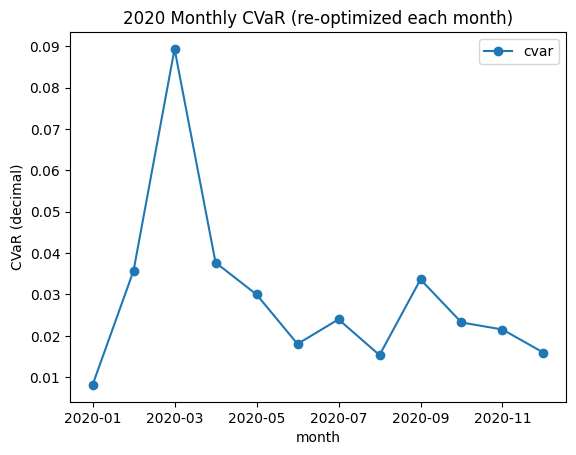

In [ ]:
# === Part 5 — Monthly re-optimization across 2020 (rolling 12 months) ===

def solve_cvar_weights(train_returns_df, beta=BETA, R_floor=R_FLOOR):
    """Solve the standard CVaR LP on a training DataFrame (rows=days, cols=assets)."""
    Yt = train_returns_df.to_numpy()
    qt, nt = Yt.shape
    mut = train_returns_df.mean().to_numpy()

    m = gp.Model("cvar_monthly_train")
    m.Params.OutputFlag = 0

    x = m.addVars(nt, lb=0.0)
    a = m.addVar(lb=-GRB.INFINITY)
    u = m.addVars(qt, lb=0.0)

    m.addConstr(gp.quicksum(x[j] for j in range(nt)) == 1)
    m.addConstr(gp.quicksum(mut[j]*x[j] for j in range(nt)) >= R_floor)
    for k in range(qt):
        m.addConstr(-gp.quicksum(Yt[k, j]*x[j] for j in range(nt)) - a - u[k] <= 0)

    coef = 1/((1-beta)*qt)
    m.setObjective(a + coef*gp.quicksum(u[k] for k in range(qt)), GRB.MINIMIZE)
    m.optimize()

    return pd.Series([x[j].X for j in range(nt)], index=train_returns_df.columns)

r_all = pd.concat([r19[assets], r20[assets]], axis=0).sort_index()

monthly_results = []
weights_by_month = {}

months_2020 = r20.index.to_period("M").unique().tolist()
for mth in months_2020:
    # rolling window
    end_of_prev_month = (mth.start_time - pd.offsets.Day(1))
    start_12m = end_of_prev_month - pd.DateOffset(years=1) + pd.offsets.Day(1)
    train_mask = (r_all.index >= start_12m) & (r_all.index <= end_of_prev_month)
    train_df = r_all.loc[train_mask, assets]

    # solve for this month's portfolio
    w_m = solve_cvar_weights(train_df, beta=BETA, R_floor=R_FLOOR)
    weights_by_month[str(mth)] = w_m

    # evaluate on the actual month mth
    test_mask = (r20.index.to_period("M") == mth)
    test_df = r20.loc[test_mask, assets]
    _, cvar_m = var_cvar(w_m, test_df, beta=BETA)

    monthly_results.append({
        "month": str(mth),
        "cvar": float(cvar_m)
    })

monthly_cvar_df = pd.DataFrame(monthly_results).set_index("month")

print("\n=== Part 5 — Monthly re-optimization (2020) ===")
print(monthly_cvar_df)

print("\nSummary (2020 monthly CVaR):")
print(f"Mean  : {100*monthly_cvar_df['cvar'].mean():.3f}%")
print(f"Std   : {100*monthly_cvar_df['cvar'].std(ddof=1):.3f}%")
print(f"Min   : {100*monthly_cvar_df['cvar'].min():.3f}%  ({monthly_cvar_df['cvar'].idxmin()})")
print(f"Max   : {100*monthly_cvar_df['cvar'].max():.3f}%  ({monthly_cvar_df['cvar'].idxmax()})")

monthly_cvar_df.plot(y="cvar", marker="o", title="2020 Monthly CVaR (re-optimized each month)")
plt.ylabel("CVaR (decimal)")
plt.show()


## **Part 6: Stable Portfolio**


=== Part 6 — Stability (5pp threshold) ===
         num_violations
month                  
2020-02               0
2020-03               5
2020-04               9
2020-05               5
2020-06               4
2020-07               2
2020-08               4
2020-09               8
2020-10               5
2020-11               1
2020-12               0

Total asset-level violations across 2020: 43

Top 10 largest month-to-month weight changes:
     asset    month  abs_change
310   CTXS  2020-04    0.451674
1080   XEL  2020-04    0.332126
266   CHTR  2020-04    0.296739
359   COST  2020-09    0.289998
311   CTXS  2020-05    0.204316
360   COST  2020-10    0.195871
312   CTXS  2020-06    0.195848
414   EBAY  2020-09    0.167736
410   EBAY  2020-05    0.158282
486   GILD  2020-04    0.154766


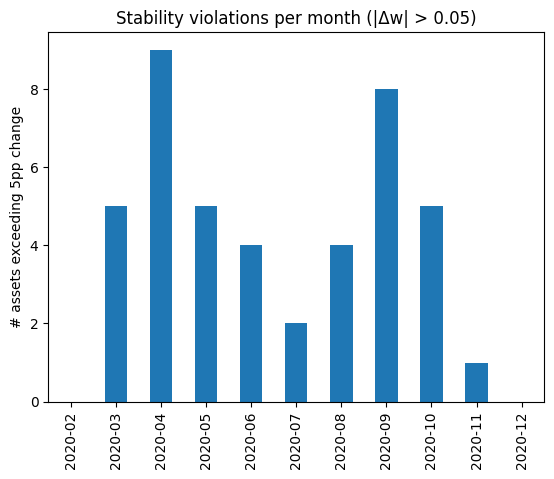

In [ ]:
# === Part 6 — Stability check (|Δweight| ≤ 0.05 per asset month-to-month) ===

from collections import OrderedDict

# Order months to compute consecutive diffs
ordered_months = sorted(weights_by_month.keys())
W = pd.DataFrame({m: weights_by_month[m] for m in ordered_months})  # rows=assets, cols=months
W_diff = W.diff(axis=1).abs()  # month-to-month absolute change

THRESH = 0.05
violations = (W_diff.iloc[:, 1:] > THRESH)  # exclude first col (no previous)
violations_count_by_month = violations.sum(axis=0)  # count across assets

print("\n=== Part 6 — Stability (5pp threshold) ===")
stab_df = pd.DataFrame({
    "month": violations.columns,
    "num_violations": violations_count_by_month.values
}).set_index("month")
print(stab_df)

total_violations = int(violations_count_by_month.sum())
print(f"\nTotal asset-level violations across 2020: {total_violations}")

# Show top 10 largest month-to-month moves (for diagnostics)
largest_moves = (
    W_diff.stack()
        .reset_index()
        .rename(columns={"level_0": "asset", "level_1": "month", 0: "abs_change"})
        .sort_values("abs_change", ascending=False)
)
print("\nTop 10 largest month-to-month weight changes:")
print(largest_moves.head(10))

# Optional: plot violations per month
violations_count_by_month.plot(kind="bar", title="Stability violations per month (|Δw| > 0.05)")
plt.ylabel("# assets exceeding 5pp change")
plt.show()

# ---- If wanted to enforce stability in the LP ----
# For each asset j and month t (t>first):
#   -0.05 ≤ x_{j,t} - x_{j,t-1} ≤ 0.05
# In Gurobi, that becomes two linear constraints per (j,t):
#   m.addConstr(x_curr[j] - x_prev[j] <=  0.05)
#   m.addConstr(x_curr[j] - x_prev[j] >= -0.05)
# where x_prev is the (fixed) vector of previous month’s optimal weights, or decision vars in a joint multi-month model.
